In [2]:
# load liabraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import sklearn

In [3]:
# read.csv(file)
df = pd.read_csv('/Machine learning/Data wrangling and EDA/Fish_dataset.csv')

In [4]:
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [5]:
# Head/tail/size/shape/info()
# Describe() -> skewed or not
# Data Exploration -> 1.Histogram 2.Bar plot 3.Pairplot/corr matrix/heatmap 4.Latitude/longitude/map
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [6]:
# Missing value -> 1.zero 2.Actual 3.Drop 4.mean 5.medain 6.mode 7.series data = bfill/ffill
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

Linear Regression
For the given ‘fish_datasets’, perform the following tasks:

Q1. Plot a bar chart showing the count of individual species?

Q2. Identify outliers and remove if any?

Q3. Build a regression model and print a regression equation?

Q4. What is the score of the model?


Q5. Compare real and predicted weights and give a conclusion statement based on it?




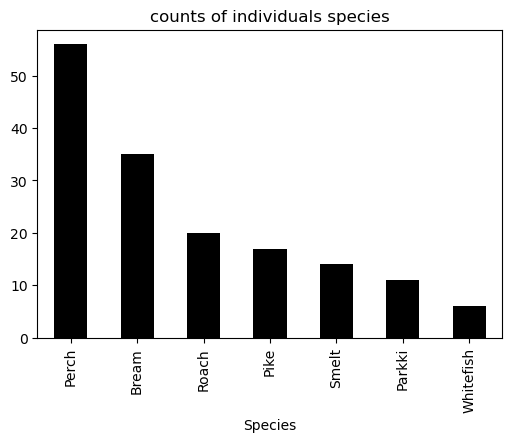

In [7]:
# Q1. Plot a bar chart showing the count of individual species?
import matplotlib.pyplot as plt
count=df['Species'].value_counts()
plt.figure(figsize=(6,4))
count.plot(kind='bar',color='black')
plt.title('counts of individuals species')
plt.show()

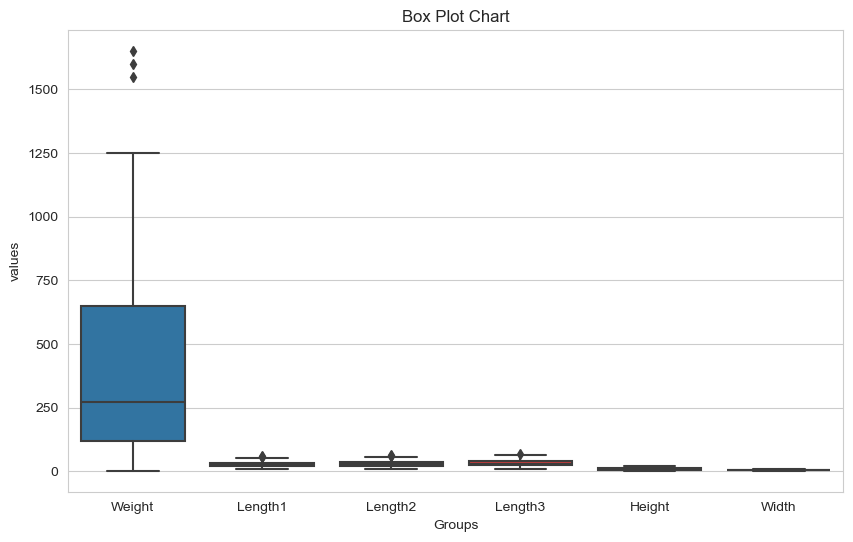

In [8]:
# Q2. Identify outliers and remove if any?
import seaborn as sns

sns.set_style('whitegrid')
plt.figure(figsize= (10,6))
sns.boxplot(data=df)
plt.xlabel('Groups')
plt.ylabel('values')
plt.title('Box Plot Chart')
plt.show()

In [9]:
# Categories -> 1.Nominal = One hot encoding(get dummies) 2.Ordinal = Factorization
# Outliers -> 1.Choose 1 column 2.count of lower and upper outliers(no label/target dealed) 3.plot box plot 4.IQR method for all column
for cols in df.columns[::]:
    if df[cols].dtype == object:
        continue
    else:
        Q1 = df[cols].quantile(q=0.25)
        Q3 = df[cols].quantile(q=0.75)
        iqr = Q3 - Q1
        
        low = Q1-1.5*(Q3 - Q1)
        high =  Q3 + 1.5*(Q3 - Q1)
        df.loc[(df[cols]<low) | (df[cols]>high), cols] = df[cols].median()

In [10]:
x = df['Species']
df1= pd.get_dummies(x)
df = pd.concat([df,df1], axis = 1)
df.drop(['Species'], axis = 1, inplace=True)

In [11]:
df.corr()

,Weight,Length1,Length2,Length3,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
Weight,1.000000,0.895156,0.899167,0.843011,0.799031,0.898463,0.411386,-0.188597,0.020898,0.121877,-0.265733,-0.356285,0.098894
Length1,0.895156,1.000000,0.999418,0.932271,0.675585,0.872316,0.274864,-0.209513,0.007251,0.431045,-0.210723,-0.496577,0.069339
Length2,0.899167,0.999418,1.000000,0.934579,0.691202,0.878628,0.292935,-0.209550,0.008808,0.419917,-0.215863,-0.509558,0.072489
Length3,0.843011,0.932271,0.934579,1.000000,0.717631,0.868443,0.349647,-0.199465,-0.093027,0.477756,-0.203718,-0.498022,0.058928
Height,0.799031,0.675585,0.691202,0.717631,1.000000,0.792881,0.772443,-0.000547,-0.191405,-0.101810,-0.202076,-0.491731,0.048951
Width,0.898463,0.872316,0.878628,0.868443,0.792881,1.000000,0.319347,-0.194147,0.144021,0.137722,-0.171465,-0.569018,0.124388
Bream,0.411386,0.274864,0.292935,0.349647,0.772443,0.319347,1.000000,-0.144840,-0.391741,-0.183825,-0.201526,-0.165083,-0.105209
Parkki,-0.188597,-0.209513,-0.209550,-0.199465,-0.000547,-0.194147,-0.144840,1.000000,-0.201021,-0.094329,-0.103413,-0.084712,-0.053988
Perch,0.020898,0.007251,0.008808,-0.093027,-0.191405,0.144021,-0.391741,-0.201021,1.000000,-0.255127,-0.279694,-0.229116,-0.146018
Pike,0.121877,0.431045,0.419917,0.477756,-0.101810,0.137722,-0.183825,-0.094329,-0.255127,1.000000,-0.131247,-0.107513,-0.068519


In [12]:
# Q3. Build a regression model and print a regression equation?
x = df.drop("Weight", axis = 1)
y = df['Weight']
### Bifriciation into
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)
# import the model
from sklearn.linear_model import LinearRegression
# instantiate model
LT = LinearRegression()
# fittting model
LT.fit(X_train,y_train)
LT.coef_
LT.intercept_
# Saving
Ypredict = LT.predict(X_test)
Ytrain = LT.predict(X_train)
# mean square error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, Ypredict)
  # model predict (y_test) = ypredicted
from sklearn.metrics import r2_score
r2_test=r2_score(y_test, Ypredict)
r2_train=r2_score(y_train, Ytrain)
print('r2_test = ',r2_test, '\nr2_train = ',r2_train)

r2_test =  0.9266358065633944 
r2_train =  0.9453957160037875


In [13]:

from sklearn.linear_model import Lasso
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

Lasso()

In [14]:
y_pred_lasso_train = lasso_reg.predict(X_train)
y_pred_lasso_test = lasso_reg.predict(X_test)

In [15]:
lasso_reg.score(X_test,y_test)

0.9331738838429384

In [16]:
lasso_reg.score(X_train,y_train)

0.9431994808156305

In [17]:
# using ridge(L2)
from sklearn.linear_model import Ridge
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

Ridge()

In [18]:
ridge_reg.score(X_test,y_test)

0.9278486732207103

In [19]:
ridge_reg.score(X_train,y_train)

0.9436543750548002

In [20]:
# using elasticNet
from sklearn.linear_model import ElasticNet
En_reg = ElasticNet()
En_reg.fit(X_train,y_train)

ElasticNet()

In [21]:
En_reg.score(X_test,y_test)

0.8985498073432486

In [22]:
En_reg.score(X_train,y_train)

0.8951047991866802

In [23]:
# Q3. Build a regression model and print a regression equation?
x = df['Weight'].values.reshape(-1,1)
y = df['Width'].values
### Bifriciation into
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)
# import the model
from sklearn.linear_model import LinearRegression
# instantiate model
LT = LinearRegression()
# fittting model
LT.fit(X_train,y_train)
LT.coef_
LT.intercept_
# Saving
Ypredict = LT.predict(X_test)
Ytrain = LT.predict(X_train)
# mean square error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, Ypredict)
 
 # model predict (y_test) = ypredicted
from sklearn.metrics import r2_score
r2_test=r2_score(y_test, Ypredict)
r2_train=r2_score(y_train, Ytrain)
print('r2_test = ',r2_test, '\nr2_train = ',r2_train)

r2_test =  0.7786611952883109 
r2_train =  0.8170543574935216


In [24]:
df.shape

(159, 13)

In [25]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

Lasso()

In [26]:
y_pred_lasso_train = lasso_reg.predict(X_train)
y_pred_lasso_test = lasso_reg.predict(X_test)

In [27]:
lasso_reg.score(X_test,y_test)

0.7785567448907861

In [28]:
lasso_reg.score(X_train,y_train)

0.817050341812085

In [29]:
# using ridge(L2)
from sklearn.linear_model import Ridge
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

Ridge()

In [30]:
ridge_reg.score(X_test,y_test)

0.7786611915203345

In [31]:
ridge_reg.score(X_train,y_train)

0.8170543574935158

In [32]:
# using elasticNet
from sklearn.linear_model import ElasticNet
En_reg = ElasticNet()
En_reg.fit(X_train,y_train)

ElasticNet()

In [33]:
En_reg.score(X_test,y_test)

0.778609624816919

In [34]:
En_reg.score(X_train,y_train)

0.8170533440331975

In [35]:
from sklearn.preprocessing import StandardScaler
# define min max scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(x)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(scaled,y,test_size=0.2,random_state=40)


from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
Reg_predict=reg.predict(X_test)
Reg_predict_train = reg.predict(X_train)

from sklearn import metrics
print("R score",metrics.r2_score(y_test,Reg_predict))
print("R score",metrics.r2_score(y_train,Reg_predict_train))
print("MSE = ", metrics.mean_squared_error(y_test,Reg_predict))

R score 0.7786611952883109
R score 0.8170543574935215
MSE =  0.8037492048357775
